In [45]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install seaborn
%pip install matplotlib
%pip install skorch #for wrapping pytorch models in sklearn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     --------------------------------------- 70.9/70.9 MB 12.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

In [4]:
dynamic_data = pd.read_csv('sph_dynamic.csv')

In [5]:
static_data = pd.read_csv('sph_static.csv')

In [6]:
# Missing Values in Dynamic Table
dynamic_data.isnull().sum()

stay_id                   0
charttime                 0
total_protein          6930
calcium                 933
creatinine              261
glucose                 444
sodium                  214
chloride                241
heart_rate             6833
sbp                    6895
dbp                    6895
mbp                    6887
resp_rate              6832
temperature            6974
hemoglobin             1179
wbc                    1207
alt                    3964
ast                    3936
alp                    3976
bilirubin_total        3957
bilirubin_direct       6808
bilirubin_indirect     6812
ph                     7004
lactate                7012
pt                     3068
urineoutput            6942
sofa_respiration       7005
sofa_coagulation       7023
sofa_liver             7023
sofa_cardiovascular    6872
sofa_cns               6979
sofa_renal             7024
dtype: int64

In [7]:
# Drop the columns with more than 80%
for col in dynamic_data.columns:
    if dynamic_data[col].isnull().sum() > len(dynamic_data)*0.8:
        del dynamic_data[col]

In [8]:
dynamic_data.isnull().sum()

stay_id               0
charttime             0
calcium             933
creatinine          261
glucose             444
sodium              214
chloride            241
hemoglobin         1179
wbc                1207
alt                3964
ast                3936
alp                3976
bilirubin_total    3957
pt                 3068
dtype: int64

In [9]:
# ['alt','ast','alp','bilirubin_total','pt'] are liver function related test results
# create a new binary column 'liver_function_test', True/1 means have ever taken liver function test
liver_test_result = ['alt','ast','alp','bilirubin_total','pt']
def liver_categorize(group):
    flag = True
    for i in liver_test_result:
        if group[i].notnull().any():
            flag = False
    if flag:
        group['liver_function_test'] = False
    else:
        group['liver_function_test'] = True
    return group

dynamic_data = dynamic_data.groupby('stay_id').apply(liver_categorize)

C:\Users\Mervin\AppData\Local\Temp\ipykernel_6544\240455136.py:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dynamic_data = dynamic_data.groupby('stay_id').apply(liver_categorize)


In [10]:
dynamic_data

,stay_id,charttime,calcium,creatinine,glucose,sodium,chloride,hemoglobin,wbc,alt,ast,alp,bilirubin_total,pt,liver_function_test
0,35715575,2148-12-27 18:15:00.000,8.5,0.9,137.0,138.0,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,34483718,2118-01-04 03:58:00.000,8.2,0.8,129.0,141.0,101.0,8.7,11.3,NaN,NaN,NaN,NaN,12.1,True
2,31826892,2163-03-10 19:59:00.000,7.7,0.4,112.0,136.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,36154799,2131-12-02 19:14:00.000,NaN,NaN,NaN,NaN,NaN,12.3,NaN,NaN,NaN,NaN,NaN,NaN,True
4,32732521,2116-08-12 12:45:00.000,NaN,4.0,135.0,139.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7019,31292653,2192-03-18 03:14:00.000,NaN,1.4,102.0,137.0,103.0,8.7,4.9,NaN,NaN,NaN,NaN,NaN,True
7020,32964221,2127-01-30 10:00:00.000,8.6,0.5,112.0,139.0,107.0,8.9,14.3,14.0,32.0,148.0,2.6,NaN,True
7021,33493321,2142-07-28 06:02:00.000,NaN,1.1,130.0,142.0,105.0,8.4,4.0,NaN,NaN,NaN,NaN,NaN,True
7022,38658392,2189-05-17 00:13:00.000,7.3,1.0,174.0,133.0,93.0,13.0,19.5,9.0,18.0,48.0,0.5,13.0,True


In [11]:
dynamic_data.describe()

,stay_id,calcium,creatinine,glucose,sodium,chloride,hemoglobin,wbc,alt,ast,alp,bilirubin_total,pt
count,7.024000e+03,6091.000000,6763.000000,6580.000000,6810.000000,6783.000000,5845.000000,5817.000000,3060.000000,3088.000000,3048.000000,3067.000000,3956.000000
mean,3.497892e+07,8.389640,1.644019,142.289666,137.309545,102.067079,10.043353,10.973130,161.859150,243.882772,131.933727,4.248745,18.826567
std,2.832325e+06,0.820066,1.839893,89.875986,5.638384,6.731008,2.177573,8.228807,752.898832,1216.527439,123.088598,7.808056,11.588015
min,3.000414e+07,4.200000,0.100000,30.000000,83.000000,62.000000,3.900000,0.100000,1.000000,5.000000,7.000000,0.100000,9.200000
25%,3.255070e+07,7.900000,0.800000,102.000000,134.000000,98.000000,8.400000,5.900000,17.000000,22.000000,65.000000,0.500000,12.800000
50%,3.496990e+07,8.400000,1.100000,125.000000,138.000000,102.000000,9.800000,9.400000,30.000000,42.000000,92.000000,1.000000,14.900000
75%,3.746081e+07,8.900000,1.800000,159.000000,141.000000,106.000000,11.400000,14.200000,62.000000,95.000000,149.000000,3.600000,20.400000
max,3.999217e+07,12.300000,19.700000,2970.000000,185.000000,153.000000,18.400000,125.200000,15018.000000,28275.000000,1185.000000,52.600000,150.000000


In [12]:
# Assume that patients with no relevant results recorded don't have liver issues
# so we impute these patients' missing values of these columns with random number in normal range

# but i can not find the unit and normal range for them so i drop them first >_<
# dynamic_data.drop(['alt','ast','alp','bilirubin_total','pt'], axis = 1, inplace = True)

In [13]:
dynamic_data.isnull().sum()

stay_id                   0
charttime                 0
calcium                 933
creatinine              261
glucose                 444
sodium                  214
chloride                241
hemoglobin             1179
wbc                    1207
alt                    3964
ast                    3936
alp                    3976
bilirubin_total        3957
pt                     3068
liver_function_test       0
dtype: int64

In [14]:
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'alt'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'ast'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'alp'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'bilirubin_total'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'pt'].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: alt, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ast, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: alp, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: bilirubin_total, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: pt, dtype: float64


In [15]:
# use KNN to impute the rest
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 10)
dynamic_data.iloc[:,2:] = imputer.fit_transform(dynamic_data.iloc[:,2:])

In [16]:
# define normal ranges for each column
normal_ranges = {
    'alt': (5, 40),
    'ast': (10, 35),
    'alp': (40, 130),
    'bilirubin_total': (0.1, 1.0),
    'pt': (9.5, 13.5)
}

In [17]:
mask = dynamic_data['liver_function_test'] == False
n_no_test = mask.sum()
def sample_normal(col):
    lower = normal_ranges[col][0]
    upper = normal_ranges[col][1]
    return np.random.normal(loc=(lower+upper)/2, scale=(upper-lower)/6, size=n_no_test)

sampled_alt = sample_normal("alt")
sampled_ast = sample_normal("ast")
sampled_alp = sample_normal("alp")
sampled_bilirubin_total = sample_normal("bilirubin_total")
sampled_pt = sample_normal("pt")
dynamic_data.loc[mask, 'alt'] = sampled_alt
dynamic_data.loc[mask, 'ast'] = sampled_ast
dynamic_data.loc[mask, 'alp'] = sampled_alp
dynamic_data.loc[mask, 'bilirubin_total'] = sampled_bilirubin_total
dynamic_data.loc[mask, 'pt'] = sampled_pt

In [18]:
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'alt'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'ast'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'alp'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'bilirubin_total'].describe())
print(dynamic_data.loc[dynamic_data['liver_function_test']==False, 'pt'].describe())

count    349.000000
mean      21.980597
std        5.688210
min        5.020494
25%       18.228029
50%       21.992177
75%       25.609220
max       38.934797
Name: alt, dtype: float64
count    349.000000
mean      22.280703
std        4.327716
min        9.155982
25%       19.254246
50%       22.418981
75%       25.323462
max       33.661470
Name: ast, dtype: float64
count    349.000000
mean      85.901330
std       14.601475
min       45.034258
25%       76.731232
50%       85.954174
75%       95.793921
max      120.652445
Name: alp, dtype: float64
count    349.000000
mean       0.559594
std        0.152323
min        0.178063
25%        0.445153
50%        0.561748
75%        0.667882
max        1.023496
Name: bilirubin_total, dtype: float64
count    349.000000
mean      11.515246
std        0.649189
min        9.571828
25%       11.050735
50%       11.539295
75%       11.987783
max       13.498774
Name: pt, dtype: float64


In [19]:
#to address the same patinent have differrent results at the same charttime
dynamic_data = dynamic_data.groupby(['stay_id','charttime']).mean().reset_index()

In [20]:
#compute the gradient
def count_gradient(group):
    testresult = list(dynamic_data.columns)[2:-1]
    for i in testresult:
        if len(group) == 1:
            group[i+'_grad'] = 0
        else:
            time_diff = (group['charttime'].iloc[-1] - group['charttime'].iloc[-2]).total_seconds()
            group[i+'_grad'] = (group[i].iloc[-1] - group[i].iloc[-2]) / time_diff 
    return group

In [21]:
dynamic_data['charttime'] = pd.to_datetime(dynamic_data['charttime'])

In [22]:
dynamic_data.sort_values(by = ['stay_id','charttime'], inplace = True)
dynamic_data = dynamic_data.groupby('stay_id').apply(count_gradient)

C:\Users\Mervin\AppData\Local\Temp\ipykernel_6544\3194640149.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dynamic_data = dynamic_data.groupby('stay_id').apply(count_gradient)


In [23]:
# take the last values of all timepoints for each patient
dynamic_data_last = dynamic_data.drop(['charttime'],axis = 1).groupby('stay_id').tail(1)

In [24]:
# merge dynamic and static table
data = static_data.merge(dynamic_data_last, on = 'stay_id')

In [25]:
data

,stay_id,icu_intime,vent_start,vent_end,vent_duration,calcium,creatinine,glucose,sodium,chloride,...,glucose_grad,sodium_grad,chloride_grad,hemoglobin_grad,wbc_grad,alt_grad,ast_grad,alp_grad,bilirubin_total_grad,pt_grad
0,30004144,2126-04-04 13:20:25.000,4/5/26 16:00,4/6/26 17:00,25.000000,6.80,0.7,133.0,135.0,102.0,...,0.001466,0.000000,-0.000077,-0.000093,-0.000023,-0.000216,-0.001782,0.002238,0.000002,0.000093
1,30005366,2202-12-27 17:36:59.000,12/28/02 14:00,12/28/02 20:00,6.000000,8.80,6.7,41.0,139.0,100.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,30006983,2159-10-12 03:56:42.000,10/12/59 18:00,10/14/59 19:00,49.000000,7.10,1.0,89.0,136.0,108.0,...,-0.001230,0.000073,0.000110,-0.000015,0.000022,0.000055,0.000275,-0.000606,0.000004,0.000031
3,30023204,2124-07-09 16:43:55.000,7/11/24 16:00,7/12/24 16:10,24.166667,8.50,1.4,107.0,131.0,100.0,...,0.000403,-0.000050,-0.000201,0.000076,-0.000222,0.002110,0.001334,0.000534,-0.000062,-0.000226
4,30031418,2156-03-05 14:11:00.000,3/7/56 22:06,3/8/56 8:00,9.900000,7.40,0.4,133.0,139.0,106.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,39977971,2115-12-11 17:42:45.000,12/12/15 12:00,12/12/15 16:00,4.000000,8.90,2.2,98.0,132.0,97.0,...,-0.003474,0.000100,0.000033,-0.000037,-0.000017,-0.002295,0.000852,-0.000658,-0.000005,0.000010
1919,39982332,2180-03-01 22:35:04.000,3/2/80 19:00,3/3/80 8:00,13.000000,8.82,1.2,119.0,140.0,103.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1920,39985110,2141-03-03 05:57:46.000,3/4/41 20:44,3/6/41 4:00,31.266667,10.40,6.8,149.0,139.0,98.0,...,0.000425,0.000018,0.000000,0.000007,0.000052,0.000575,0.000778,-0.001323,0.000013,0.000032
1921,39986206,2183-06-19 23:25:31.000,6/20/83 22:00,6/30/83 4:00,222.000000,7.50,6.0,101.0,139.0,103.0,...,-0.000866,0.000000,0.000000,0.000017,-0.000039,0.002264,0.002580,0.003697,0.000011,0.000013


In [26]:
#Converting data type of icu_intime, vent_start and vent_end to date and time format
data['icu_intime'] = pd.to_datetime(data['icu_intime'])
data['vent_start'] = pd.to_datetime(data['vent_start'], format='%m/%d/%y %H:%M')
data['vent_end'] = pd.to_datetime(data['vent_end'], format='%m/%d/%y %H:%M')

In [27]:
data.dtypes

stay_id                          int64
icu_intime              datetime64[ns]
vent_start              datetime64[ns]
vent_end                datetime64[ns]
vent_duration                  float64
calcium                        float64
creatinine                     float64
glucose                        float64
sodium                         float64
chloride                       float64
hemoglobin                     float64
wbc                            float64
alt                            float64
ast                            float64
alp                            float64
bilirubin_total                float64
pt                             float64
liver_function_test            float64
calcium_grad                   float64
creatinine_grad                float64
glucose_grad                   float64
sodium_grad                    float64
chloride_grad                  float64
hemoglobin_grad                float64
wbc_grad                       float64
alt_grad                 

<Axes: >

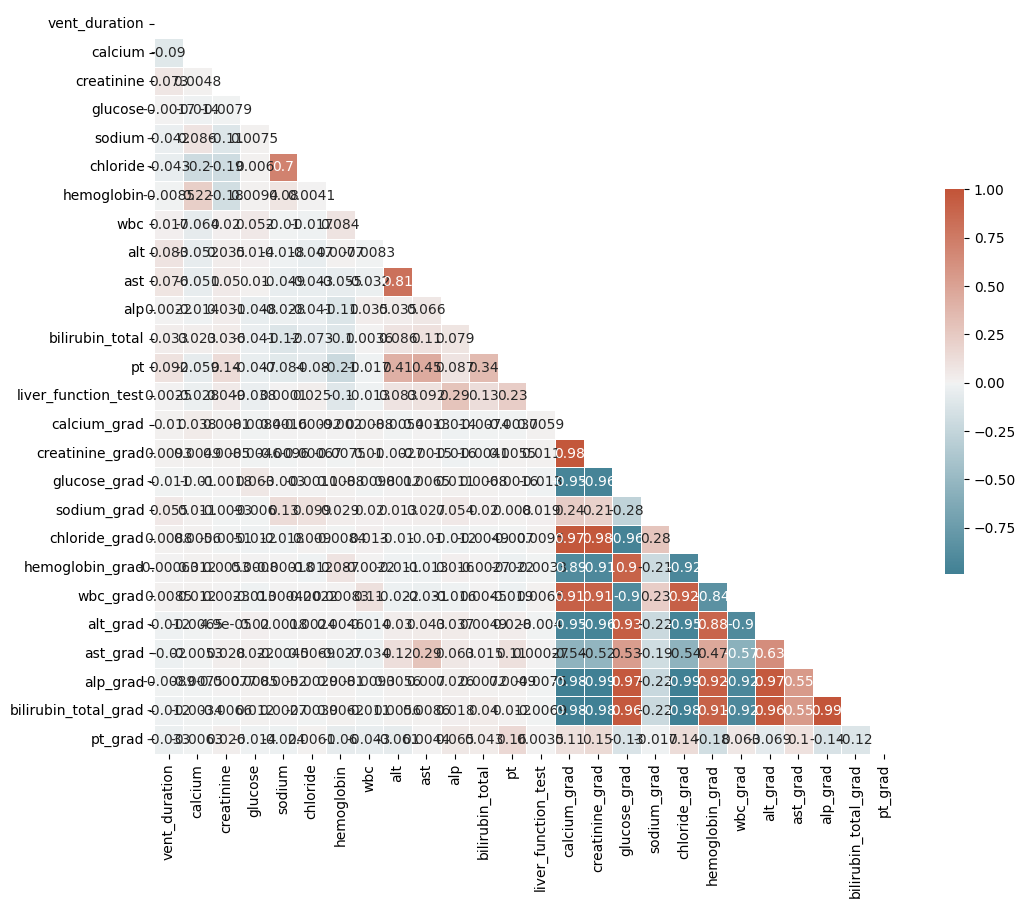

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
#Dropped icu_intime, vent_start and vent_end as they are usable for correlation
#Creating correlation matrix to observe the relationship between variables
df_corr = data.loc[:,'vent_duration':'pt_grad'].corr()

#Setting up plots
f, ax = plt.subplots(figsize=(12,10))

#Setting up lower triangle correlation matrix
mask = np.triu(np.ones(df_corr.shape), k=0).astype(bool)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


In [29]:
#Plotting pairplot to assess the relationship and distribution of each variable. 
#sns.pairplot(data.loc[:,'vent_duration':'pt'])

In [30]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()

# Scale the numeric columns using StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data[numeric_cols])

# Create a new dataframe with the scaled numeric columns
scaled_df = pd.DataFrame(scaled_df, columns=numeric_cols, index=data.index)

# Identify outliers with z-scores greater than 2.5 or less than -2.5 (95%)
z_scores = (scaled_df - scaled_df.mean()) / scaled_df.std()
outliers = data[(z_scores > 2.5).any(axis=1) | (z_scores < -2.5).any(axis=1)]

# Remove outliers from the original dataframe
trimmed_df = data.drop(outliers.index)

print("Original Shape:", data.shape)
print("Trimmed Shape:", trimmed_df.shape)
#print(sns.pairplot(trimmed_df.loc[:,'vent_duration':'pt']))

Original Shape: (1923, 30)
Trimmed Shape: (1296, 30)


<Axes: >

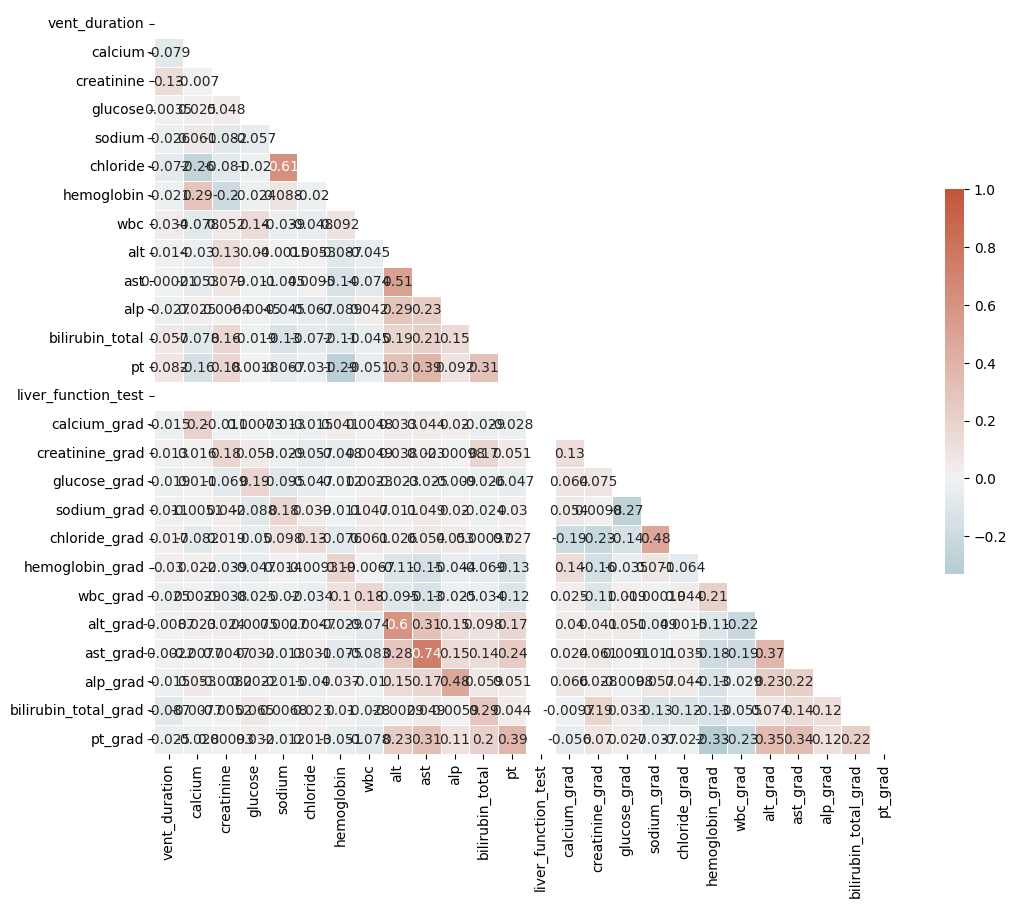

In [31]:
#Creating correlation matrix to observe the relationship between variables
trimmed_df_corr = trimmed_df.loc[:,'vent_duration':'pt_grad'].corr()

#Setting up plots
f, ax = plt.subplots(figsize=(12,10))

#Setting up lower triangle correlation matrix
mask = np.triu(np.ones(trimmed_df_corr.shape), k=0).astype(bool)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(trimmed_df_corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

## Splitting Data Set

In [142]:
from sklearn.model_selection import train_test_split
# Splitting Datasets into Train and Test
X= trimmed_df.drop(['stay_id', 'icu_intime', 'vent_start', 'vent_end','vent_duration'], axis=1)
y= trimmed_df['vent_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Split to train & test set (8:2)

In [143]:
# The dimension of the training set
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)

# The dimension of the test set
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (1036, 25)
y_train: (1036,)
X_test: (260, 25)
y_test: (260,)


## Normalising Dataset after splitting

In [189]:
from sklearn.preprocessing import MinMaxScaler
# Calculate the normalization parameters on the training set
scaler = MinMaxScaler()
scaler.fit(X_train)

# Normalize the training set using the calculated parameters
X_train_norm = scaler.transform(X_train)
X_train_norm_df = pd.DataFrame(X_train_norm, columns=X_train.columns)

# Normalize the test set using the same normalization parameters as the training set
X_test_norm = scaler.transform(X_test)
X_test_norm_df = pd.DataFrame(X_test_norm, columns=X_test.columns)

# Verify that the mean and standard deviation of the training and test sets are similar
print("Training set mean: ", np.mean(X_train_norm))
print("Training set std: ", np.std(X_train_norm))
print("Test set mean: ", np.mean(X_test_norm))
print("Test set std: ", np.std(X_test_norm))

Training set mean:  0.4277183526310874
Training set std:  0.23372975234405968
Test set mean:  0.42746991956220903
Test set std:  0.2335927091179604


## Feature Selection Using Recursive Feature Selection

In [221]:
# listing columns
X_train_norm_df.columns

Index(['calcium', 'creatinine', 'glucose', 'sodium', 'chloride', 'hemoglobin',
       'wbc', 'alt', 'ast', 'alp', 'bilirubin_total', 'pt',
       'liver_function_test', 'calcium_grad', 'creatinine_grad',
       'glucose_grad', 'sodium_grad', 'chloride_grad', 'hemoglobin_grad',
       'wbc_grad', 'alt_grad', 'ast_grad', 'alp_grad', 'bilirubin_total_grad',
       'pt_grad'],
      dtype='object')

In [228]:
# feature selection using Recursive Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=10, step=10)
X_train_selected = selector.fit_transform(X_train_norm_df, y_train)
X_test_selected = selector.transform(X_test_norm_df)
X_train.columns[selector.get_support()]
m, n = X_train_selected.shape


In [229]:
# showing the selected features
print(X_train.columns[selector.get_support()])

Index(['calcium', 'creatinine', 'sodium', 'chloride', 'ast', 'hemoglobin_grad',
       'wbc_grad', 'alt_grad', 'ast_grad', 'bilirubin_total_grad'],
      dtype='object')


## DNN Model

In [251]:
# Deep Neural Network with PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

# Define the deep neural network
class DNNModel(nn.Module):
    def __init__(self, n_layers=3, n_hidden=100, n_output=1):
        super().__init__()
        self.layers = []
        self.acts = []
        self.layers.append(nn.Linear(n, 100))
        for i in range(n_layers):
            self.layers = nn.ModuleList([nn.Linear(n, n_hidden)])
            self.acts.append(nn.ReLU())
            self.add_module(f"layer{i}", self.layers[-1])
            self.add_module(f"act{i}", self.acts[-1])
        self.output = nn.Linear(n_hidden, n_output)

    def forward(self, x):
        for layer, act in zip(self.layers, self.acts):
            x = act(layer(x))
        x = self.output(x)
        return x

# Convert X_train_selected to a tensor
X_train_torch = torch.tensor(X_train_selected, dtype=torch.float32, requires_grad=True)

# Convert y_train to a tensor
y_train_torch = y_train.clone().detach().requires_grad_(True).float()

# Initialize the model
# Adjust layers, hidden units, and output units as needed
model = DNNModel(n_layers=5, n_hidden=500, n_output=1)

# Define the loss function
criterion = nn.L1Loss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model for 1000 epochs, printing the loss every 100 epochs
# Adjust epoch number as needed
n_epoch = 200
n_epoch_quotient = round(n_epoch / 10)
for epoch in range(n_epoch):
    # Forward pass
    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss
    if (epoch+1) % n_epoch_quotient == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, n_epoch, loss.item()))


Epoch [20/200], Loss: 24.3602
Epoch [40/200], Loss: 21.7132
Epoch [60/200], Loss: 20.7915
Epoch [80/200], Loss: 20.5305
Epoch [100/200], Loss: 20.4503
Epoch [120/200], Loss: 20.4383
Epoch [140/200], Loss: 20.4346
Epoch [160/200], Loss: 20.4324
Epoch [180/200], Loss: 20.4306
Epoch [200/200], Loss: 20.4288


In [256]:
# Using Warper to conduct GridSearchCV
# Deep Neural Network with PyTorch
import torch.nn as nn
from skorch import NeuralNetRegressor
import torch.optim as optim
from sklearn.model_selection import GridSearchCV, RepeatedKFold

# define the deep neural network
class DNNGrid(nn.Module):
    def __init__(self, n_layers=3, n_hidden=100, n_output=1):
        super().__init__()
        self.layers = []
        self.acts = []
        self.layers.append(nn.Linear(n, 100))
        for i in range(n_layers):
            self.layers = nn.ModuleList([nn.Linear(n, n_hidden)])
            self.acts.append(nn.ReLU())
            self.add_module(f"layer{i}", self.layers[-1])
            self.add_module(f"act{i}", self.acts[-1])
        self.output = nn.Linear(n_hidden, n_output)

    def forward(self, x):
        for layer, act in zip(self.layers, self.acts):
            x = act(layer(x))
        x = self.output(x)
        return x

# defining selected dataset
X_train_selected = torch.Tensor(X_train_selected)
y_train = torch.Tensor(y_train)

# create model with skorch
model = NeuralNetRegressor(
    module=DNNGrid,
    max_epochs=150,
    batch_size=10,
    criterion=nn.L1Loss,
    optimizer=optim.SGD,
    module__n_layers=3,
    verbose=False
)

# define the grid search parameters
param_grid = {
    'batch_size': [100, 200, 300, 400, 500],
    'max_epochs': [10, 50, 100, 150, 200, 250, 300]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='neg_mean_absolute_error')
grid_result = grid.fit(X_train_selected, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -20.346861 using {'batch_size': 100, 'max_epochs': 300}
-21.976739 (2.580300) with: {'batch_size': 100, 'max_epochs': 10}
-20.434364 (2.330191) with: {'batch_size': 100, 'max_epochs': 50}
-20.425328 (2.333765) with: {'batch_size': 100, 'max_epochs': 100}
-20.404113 (2.338138) with: {'batch_size': 100, 'max_epochs': 150}
-20.386643 (2.331797) with: {'batch_size': 100, 'max_epochs': 200}
-20.369574 (2.339885) with: {'batch_size': 100, 'max_epochs': 250}
-20.346861 (2.334989) with: {'batch_size': 100, 'max_epochs': 300}
-25.913422 (2.632602) with: {'batch_size': 200, 'max_epochs': 10}
-20.449793 (2.343599) with: {'batch_size': 200, 'max_epochs': 50}
-20.436555 (2.332753) with: {'batch_size': 200, 'max_epochs': 100}
-20.428856 (2.339393) with: {'batch_size': 200, 'max_epochs': 150}
-20.415985 (2.333971) with: {'batch_size': 200, 'max_epochs': 200}
-20.410025 (2.331768) with: {'batch_size': 200, 'max_epochs': 250}
-20.402028 (2.336675) with: {'batch_size': 200, 'max_epochs': 300}
-26.